### Transfer Learnig (전이 학습)

In [1]:
# cats_and_dogs classification model with InceptionV3
# train : 2000 images [cat(1000) + dog(1000)]  , size는 다름
# validation : 1000 images [cat(500) + dog(500)] , size는 다름

In [2]:
import tensorflow as tf
import urllib
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers
from tensorflow.keras import Model

In [3]:
# Google InceptionV3 pretrained model 가중치 다운로드
_INCEPTION_URL = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
urllib.request.urlretrieve(_INCEPTION_URL, 'tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

('tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
 <http.client.HTTPMessage at 0x2374ef0c2b0>)

In [4]:
# Colab용 : Linux/GPU사용 
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [15]:
# Inception model(pre-trained model)과 가중치 불러오기
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = 'tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top = False,
                                weights=None)

pre_trained_model.load_weights(local_weights_file)

print(len(pre_trained_model.layers))  # 311

# 사전 훈련 계층의 가중치의 훈련(학습) 가능 여부를 설정 : False(학습 안함) , 고정
for layer in pre_trained_model.layers: # 311회 반복
    layer.trainable = False
pre_trained_model.summary()

311
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_940 (Conv2D)            (None, 74, 74, 32)   864         ['input_11[0][0]']               
                                                                                                  
 batch_normalization_940 (Batch  (None, 74, 74, 32)  96          ['conv2d_940[0][0]']             
 Normalization)                                                                                   
                                                                                   

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_950 (Batch  (None, 16, 16, 96)  288         ['conv2d_950[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_951 (Batch  (None, 16, 16, 32)  96          ['conv2d_951[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_945 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_945[0][0]']
                                                                                                  
 activatio

 activation_962 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_962[0][0]']
                                                                                                  
 conv2d_960 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_963 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_962[0][0]']         
                                                                                                  
 batch_normalization_960 (Batch  (None, 16, 16, 48)  144         ['conv2d_960[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_963 (Batch  (None, 16, 16, 96)  288         ['conv2d_963[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_966[0][0]',         
                                                                  'activation_969[0][0]',         
                                                                  'max_pooling2d_42[0][0]']       
                                                                                                  
 conv2d_974 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_974 (Batch  (None, 7, 7, 128)   384         ['conv2d_974[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_974 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_974[0][0]']
          

                                                                                                  
 batch_normalization_984 (Batch  (None, 7, 7, 160)   480         ['conv2d_984[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_984 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_984[0][0]']
                                                                                                  
 conv2d_985 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_984[0][0]']         
                                                                                                  
 batch_normalization_985 (Batch  (None, 7, 7, 160)   480         ['conv2d_985[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_995 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_994[0][0]']         
                                                                                                  
 batch_normalization_995 (Batch  (None, 7, 7, 160)   480         ['conv2d_995[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_995 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_995[0][0]']
                                                                                                  
 conv2d_991 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_99

 hNormalization)                                                                                  
                                                                                                  
 activation_1005 (Activation)   (None, 7, 7, 192)    0           ['batch_normalization_1005[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1001 (Conv2D)           (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_1006 (Conv2D)           (None, 7, 7, 192)    258048      ['activation_1005[0][0]']        
                                                                                                  
 batch_normalization_1001 (Batc  (None, 7, 7, 192)   576         ['conv2d_1001[0][0]']            
 hNormaliz

                                                                 ]                                
                                                                                                  
 conv2d_1013 (Conv2D)           (None, 7, 7, 192)    258048      ['activation_1012[0][0]']        
                                                                                                  
 batch_normalization_1013 (Batc  (None, 7, 7, 192)   576         ['conv2d_1013[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1013 (Activation)   (None, 7, 7, 192)    0           ['batch_normalization_1013[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_10

                                                                                                  
 conv2d_1016 (Conv2D)           (None, 3, 3, 320)    409600      ['mixed8[0][0]']                 
                                                                                                  
 batch_normalization_1018 (Batc  (None, 3, 3, 384)   1152        ['conv2d_1018[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1019 (Batc  (None, 3, 3, 384)   1152        ['conv2d_1019[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1022 (Batc  (None, 3, 3, 384)   1152        ['conv2d_1022[0][0]']            
 hNormaliz

                                                                                                  
 average_pooling2d_98 (AverageP  (None, 3, 3, 2048)  0           ['mixed9[0][0]']                 
 ooling2D)                                                                                        
                                                                                                  
 conv2d_1025 (Conv2D)           (None, 3, 3, 320)    655360      ['mixed9[0][0]']                 
                                                                                                  
 batch_normalization_1027 (Batc  (None, 3, 3, 384)   1152        ['conv2d_1027[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1028 (Batc  (None, 3, 3, 384)   1152        ['conv2d_1028[0][0]']            
 hNormaliz

In [28]:
# 마지막 층 출력 확인하기(마지막 출력 층을 선택)
#  mixed7 (Concatenate)  :    (None, 7, 7, 768)
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ',last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [26]:
# layer의 층 번호 구하기
# for i,layer in enumerate(pre_trained_model.layers): # 311회 반복
#     if(layer.name == 'mixed7'):
#         print(i+1)

# layer의 층 번호 구하기
pre_trained_model.layers.index(pre_trained_model.get_layer('mixed7')) + 1

229

In [36]:
# 모델 구성  : pre_trained model layer(229)  + 4  --> 233 layers
# (1) Flatten layer
x = layers.Flatten()(last_output)
# (2) FC(=Dense) layer
x = layers.Dense(1024,activation='relu')(x)
# (3) Dropout layer
x = layers.Dropout(0.2)(x)
# (4) Output layer : 2진 분류, sigmoid
x = layers.Dense(1,activation='sigmoid')(x)

model = Model(pre_trained_model.input,x)

model.compile(optimizer=RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_940 (Conv2D)            (None, 74, 74, 32)   864         ['input_11[0][0]']               
                                                                                                  
 batch_normalization_940 (Batch  (None, 74, 74, 32)  96          ['conv2d_940[0][0]']             
 Normalization)                                                                                   
                                                                                            

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_950 (Batch  (None, 16, 16, 96)  288         ['conv2d_950[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_951 (Batch  (None, 16, 16, 32)  96          ['conv2d_951[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_945 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_945[0][0]']
                                                                                                  
 activatio

 activation_962 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_962[0][0]']
                                                                                                  
 conv2d_960 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_963 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_962[0][0]']         
                                                                                                  
 batch_normalization_960 (Batch  (None, 16, 16, 48)  144         ['conv2d_960[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_963 (Batch  (None, 16, 16, 96)  288         ['conv2d_963[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_966[0][0]',         
                                                                  'activation_969[0][0]',         
                                                                  'max_pooling2d_42[0][0]']       
                                                                                                  
 conv2d_974 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_974 (Batch  (None, 7, 7, 128)   384         ['conv2d_974[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_974 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_974[0][0]']
          

                                                                                                  
 batch_normalization_984 (Batch  (None, 7, 7, 160)   480         ['conv2d_984[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_984 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_984[0][0]']
                                                                                                  
 conv2d_985 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_984[0][0]']         
                                                                                                  
 batch_normalization_985 (Batch  (None, 7, 7, 160)   480         ['conv2d_985[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_995 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_994[0][0]']         
                                                                                                  
 batch_normalization_995 (Batch  (None, 7, 7, 160)   480         ['conv2d_995[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_995 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_995[0][0]']
                                                                                                  
 conv2d_991 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_99

 hNormalization)                                                                                  
                                                                                                  
 activation_1005 (Activation)   (None, 7, 7, 192)    0           ['batch_normalization_1005[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1001 (Conv2D)           (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_1006 (Conv2D)           (None, 7, 7, 192)    258048      ['activation_1005[0][0]']        
                                                                                                  
 batch_normalization_1001 (Batc  (None, 7, 7, 192)   576         ['conv2d_1001[0][0]']            
 hNormaliz

 dense_3 (Dense)                (None, 1)            1025        ['dropout_1[0][0]']              
                                                                                                  
Total params: 47,512,481
Trainable params: 38,537,217
Non-trainable params: 8,975,264
__________________________________________________________________________________________________


In [30]:
# cats_and_dogs 데이터셋 다운로드 
_TRAIN_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
urllib.request.urlretrieve(_TRAIN_URL, 'tmp/cats_and_dogs_filtered.zip')

('tmp/cats_and_dogs_filtered.zip', <http.client.HTTPMessage at 0x2382fd75c40>)

In [31]:
# 압축해제
local_zip = 'tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

In [32]:
# 이미지 데이터 경로 설정
import os

base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

### 이미지 증강 구현

In [34]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

# train data의 generator
train_generator = train_datagen.flow_from_directory(
                  train_dir,              # 이미지 파일 디렉터리 경로:'tmp/horse-or-human/'
                  target_size=(150,150),  # resize될 크기
                  batch_size=20,
                  class_mode='binary')    # 2진 분류
                  #save_to_dir='tmp/saved_train_image')  

# validation data의 generator
validation_generator = validation_datagen.flow_from_directory(
                  validation_dir,         # 이미지 파일 디렉터리 경로:'tmp/validation-horse-or-human/'
                  target_size=(150,150),  # resize될 크기
                  batch_size=20,
                  class_mode='binary')    # 2진 분류

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
# 학습 
history = model.fit(
            train_generator,     # X
            steps_per_epoch=100, # 2000/20 , train image number/train batch_size
            epochs = 20,
            validation_data=validation_generator,
            validation_steps=50) # 1000/20

Epoch 1/20
100/100 [==============================] - 16s 99ms/step - loss: 0.3041 - accuracy: 0.8815 - val_loss: 0.1097 - val_accuracy: 0.9580
Epoch 2/20
100/100 [==============================] - 9s 94ms/step - loss: 0.2471 - accuracy: 0.9050 - val_loss: 0.1015 - val_accuracy: 0.9640
Epoch 3/20
100/100 [==============================] - 9s 94ms/step - loss: 0.2129 - accuracy: 0.9225 - val_loss: 0.0911 - val_accuracy: 0.9680
Epoch 4/20
100/100 [==============================] - 9s 91ms/step - loss: 0.2030 - accuracy: 0.9265 - val_loss: 0.1147 - val_accuracy: 0.9660
Epoch 5/20
100/100 [==============================] - 9s 93ms/step - loss: 0.1757 - accuracy: 0.9330 - val_loss: 0.1334 - val_accuracy: 0.9590
Epoch 6/20
100/100 [==============================] - 9s 94ms/step - loss: 0.1756 - accuracy: 0.9420 - val_loss: 0.1159 - val_accuracy: 0.9650
Epoch 7/20
100/100 [==============================] - 9s 92ms/step - loss: 0.1668 - accuracy: 0.9385 - val_loss: 0.1199 - val_accuracy: 0.964

### 학습 결과 시각화

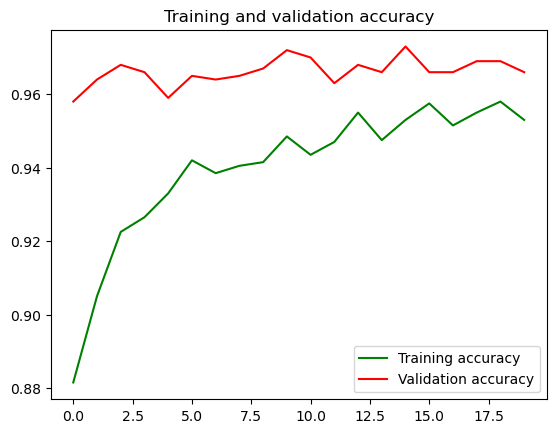

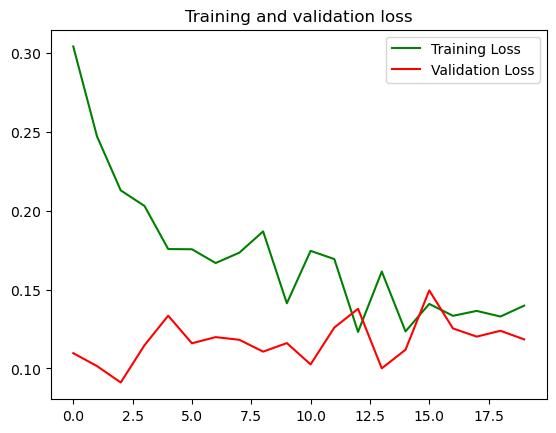

In [38]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
#  결과 : InceptionV3 pretrained model 사용 시 validation의 정확도가 크게 향상됨
#  val_accuracy: 0.7360 ---> val_accuracy: 0.9660